# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [1]:
import pandas as pd
import numpy as np

# Загрузка данных, вывод общей информации
data = pd.read_csv('./spam_or_not_spam.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [2]:
# Статистика распределения классов
data['label'].value_counts()

label
0    2500
1     500
Name: count, dtype: int64

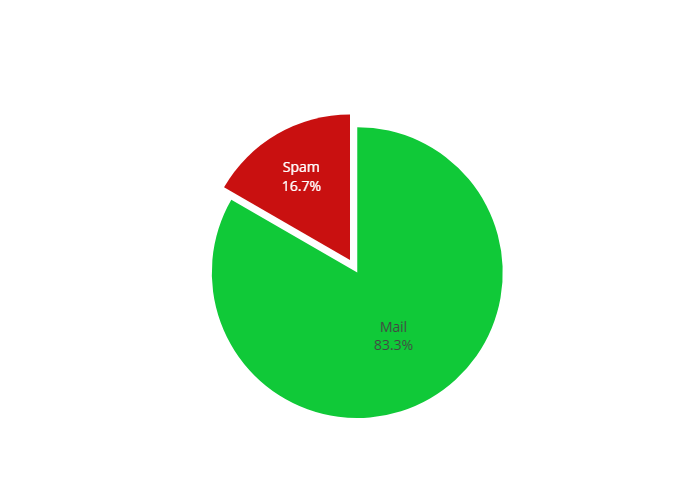

In [3]:
import plotly.graph_objects as go

# Визуализация распределения по классам
# Построение круговой диаграммы
fig = go.Figure(data=[go.Pie(labels=['Mail', 'Spam'],
                             values=data['label'].value_counts())])
fig.update_traces(textinfo='label+percent', # Содержимое подписи
                  textfont_size=14, # Размер шрифта подписи
                  pull=[0.1, 0], # Сдвиг сектора
                  marker=dict(colors=["#10c938", "#c91010"]), # Цвета секторов
                  showlegend=False) # Скрыть легенду
# Размер полотна
fig.update_layout(autosize = False, width = 600, height = 600)
# Прозрачность фона
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)',
                   'paper_bgcolor': 'rgba(0, 0, 0, 0)'})
fig.show('png')

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [5]:
# Очистка от пропущенных значений
data['email'] = data['email'].replace(r'^\s*$', np.nan, regex=True)
data.dropna(axis=0, how='any', inplace=True)

Переводим данные в векторный вид:

In [6]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [7]:
print(f'Количество признаков: {X.shape[1]}')

Количество признаков: 34116


## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [8]:
# Целевая переменная
y = data['label']

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [9]:
from sklearn.model_selection import train_test_split

# Разделение выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [10]:
print(f'Среднее значение целевой переменной по тестовой выборке: {y_test.mean():.3f}')

Среднее значение целевой переменной по тестовой выборке: 0.165


## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [11]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve

# Построение модели
model = ComplementNB(alpha=0.01)
model.fit(X_train, y_train)

,alpha,0.01
,force_alpha,True
,fit_prior,True
,class_prior,None
,norm,False


Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [12]:
# Оценка модели
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Достоверность(train): {accuracy_score(y_train, y_train_pred):.3f}')
print(f'Достоверность(test): {accuracy_score(y_test, y_test_pred):.3f}')
print(f'Точность(train): {precision_score(y_train, y_train_pred):.3f}')
print(f'Точность(test): {precision_score(y_test, y_test_pred):.3f}')
print(f'Полнота(train): {recall_score(y_train, y_train_pred):.3f}')
print(f'Полнота(test): {recall_score(y_test, y_test_pred):.3f}')
print(f'F1-мера(train): {f1_score(y_train, y_train_pred):.3f}')
print(f'F1-мера(test): {f1_score(y_test, y_test_pred):.3f}')

Достоверность(train): 1.000
Достоверность(test): 0.988
Точность(train): 1.000
Точность(test): 1.000
Полнота(train): 0.997
Полнота(test): 0.927
F1-мера(train): 0.999
F1-мера(test): 0.962


Нарисуйте ROC-кривую:

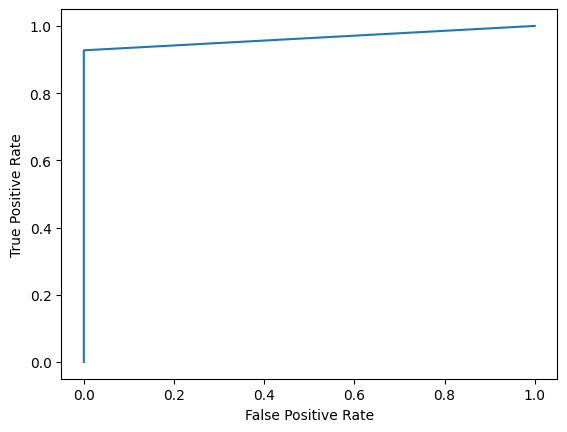

In [13]:
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_test_pred)

# построение ROC кривой
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [14]:
from sklearn.model_selection import GridSearchCV

# Подбор гиперпараметра
param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1]}
grid_search = GridSearchCV(estimator=ComplementNB(), 
                           param_grid=param_grid,
                           scoring='f1',
                           cv=5,
                           n_jobs = -1)
grid_search.fit(X_train, y_train) 
print(f"accuracy на тестовом наборе: {grid_search.score(X_test, y_test):.2f}")
y_test_pred = grid_search.predict(X_test)
print(f'f1_score на тестовом наборе: {f1_score(y_test, y_test_pred):.2f}')
print(f"Наилучшие значения гиперпараметров: {grid_search.best_params_}")

accuracy на тестовом наборе: 0.98
f1_score на тестовом наборе: 0.98
Наилучшие значения гиперпараметров: {'alpha': 0.5}


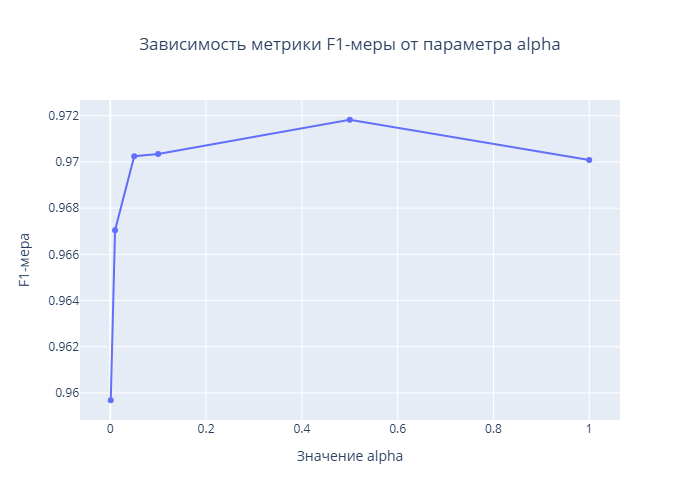

In [15]:
results_df = pd.DataFrame(grid_search.cv_results_)
results_df['alpha'] = results_df['params'].apply(lambda d: d['alpha'])

# Построение графика
fig = go.Figure(data=go.Scatter(x=results_df['alpha'],
                                y=results_df['mean_test_score']))
fig.update_layout(title=f'Зависимость метрики F1-меры от параметра alpha',
                  title_x=0.5,
                  xaxis_title='Значение alpha',
                  yaxis_title='F1-мера')
fig.update_layout(autosize = False, width = 1000, height = 500)
fig.show('png')

Исходя из графика, качество классификации зависит от параметра $alpha$, следовательно, при построении моделей на базе ComplementNB целесообразно проводить подбор данного гиперпараметра.